# A First Look at Data

### Uploading Data

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Formatted version of the 'date of travel' column, edited by Excel Format Cell
cab_data = pd.read_csv('Cab_Data2.csv') 
city_data = pd.read_csv('City.csv')
cust_id = pd.read_csv('Customer_ID.csv')
trans_id = pd.read_csv('Transaction_ID.csv')

# 'data' for show all data
data = pd.concat([
    cab_data, 
    city_data, 
    cust_id,
    trans_id,
]) 

In [3]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cab_data.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [6]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
city_data.shape

(20, 3)

In [8]:
city_data.dtypes

City          object
Population    object
Users         object
dtype: object

In [9]:
cust_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
cust_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [11]:
trans_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
trans_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [13]:
cab_data.shape, city_data.shape, cust_id.shape, trans_id.shape 

((359392, 7), (20, 3), (49171, 4), (440098, 3))

### Preparing the DataFrames

In [14]:
# Parsing 'year' from Date of Travel
date = list(cab_data['Date of Travel'].str.split('-'))
years = []
for y in date:
    years.append(y[0])
cab_data['Year'] = years

In [15]:
# Drop Date of Travel column
cab_data = cab_data.drop(columns=['Date of Travel'])

In [16]:
from functools import reduce

# Merge the dataframes
data_frames = [cab_data, trans_id]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Transaction ID'],
                                            how='inner'), data_frames)

data_frames = [df_merged,city_data]
df_merged2 = reduce(lambda  left,right: pd.merge(left,right,on=['City'],
                                            how='inner'), data_frames)

data_frames = [df_merged2, cust_id]
final_data = reduce(lambda  left,right: pd.merge(left,right,on=['Customer ID'],
                                            how='inner'), data_frames)

In [17]:
final_data['Profit of Rides'] = final_data['Price Charged'] - final_data['Cost of Trip']

In [18]:
final_data.dtypes

Transaction ID          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Year                   object
Customer ID             int64
Payment_Mode           object
Population             object
Users                  object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Profit of Rides       float64
dtype: object

In [19]:
final_data.head(10)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Profit of Rides
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,29290,Card,"814,885","24,701",Male,28,10813,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,29290,Cash,"814,885","24,701",Male,28,10813,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,29290,Card,"814,885","24,701",Male,28,10813,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,27703,Card,"814,885","24,701",Male,27,9237,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,27703,Card,"814,885","24,701",Male,27,9237,253.9808
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018,27703,Cash,"814,885","24,701",Male,27,9237,50.8912
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,2018,27703,Card,"814,885","24,701",Male,27,9237,25.0960
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,28712,Cash,"814,885","24,701",Male,53,11242,27.5680
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016,28712,Card,"814,885","24,701",Male,53,11242,210.0920
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,2017,28712,Card,"814,885","24,701",Male,53,11242,118.9736


In [20]:
final_data.tail()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Profit of Rides
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018,51406,Cash,"418,859","127,001",Female,29,6829,143.6180
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018,51406,Cash,"418,859","127,001",Female,29,6829,23.0464
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018,51406,Card,"418,859","127,001",Female,29,6829,-5.8540
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018,51406,Cash,"418,859","127,001",Female,29,6829,-6.0900
359391,10370709,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,2018,51406,Card,"418,859","127,001",Female,29,6829,25.7948


# Exploratory Data Analysis (EDA)

### Data Statistics

In [21]:
final_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit of Rides
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000


In [22]:
# Years dataframes for any calculation 

# 2016 df
y_16 = (final_data.loc[final_data['Year'] == '2016'])
# 2017 df
y_17 = (final_data.loc[final_data['Year'] == '2017'])
# 2018 df
y_18 = (final_data.loc[final_data['Year'] == '2018'])

In [23]:
# For example Average Profit Per KM
avg_pro_16=y_16['Profit of Rides'].sum() / y_16['KM Travelled'].sum()
avg_pro_17=y_17['Profit of Rides'].sum() / y_17['KM Travelled'].sum()
avg_pro_18=y_18['Profit of Rides'].sum() / y_18['KM Travelled'].sum()

### Data Visualization

array([[<AxesSubplot:title={'center':'KM Travelled'}>,
        <AxesSubplot:title={'center':'Price Charged'}>],
       [<AxesSubplot:title={'center':'Cost of Trip'}>,
        <AxesSubplot:title={'center':'Profit of Rides'}>]], dtype=object)

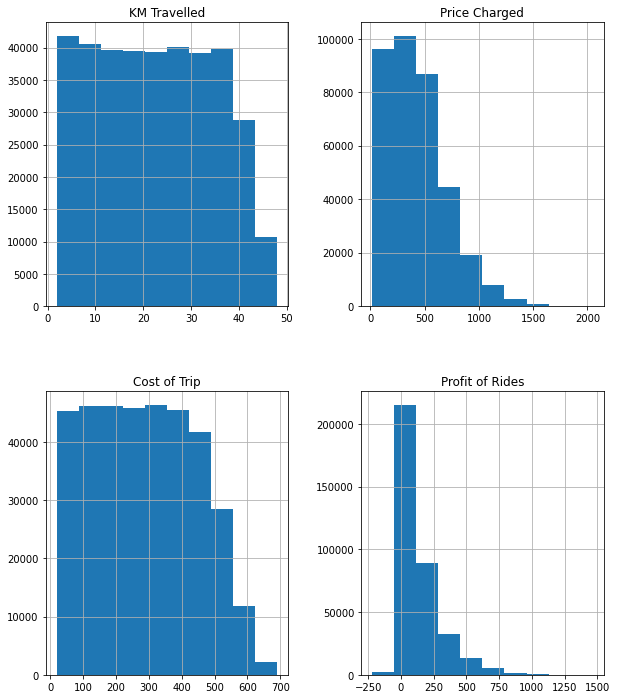

In [24]:
numerical_attributes = final_data.select_dtypes(include=['float'])

numerical_attributes.hist(figsize=(10,12))

<AxesSubplot:xlabel='Company', ylabel='count'>

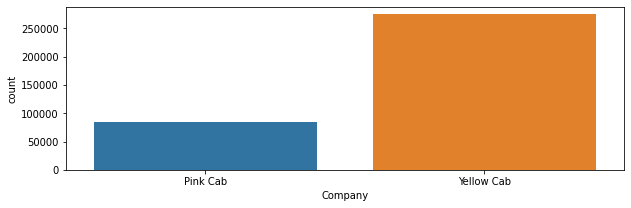

In [25]:
categorical_attributes = final_data.select_dtypes(include=['object'])

plt.figure(figsize=(10,3))
sns.countplot(data=categorical_attributes, x='Company')

<AxesSubplot:xlabel='City', ylabel='count'>

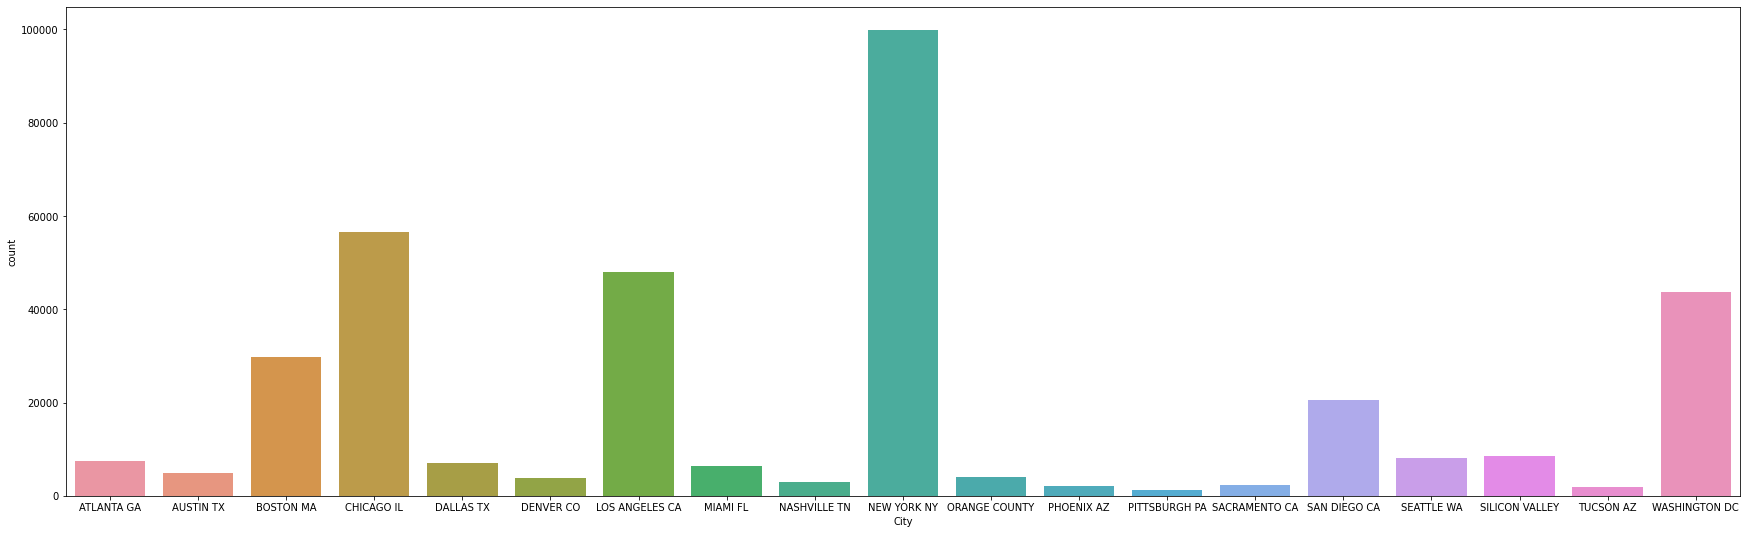

In [26]:
plt.figure(figsize=(30,9))
sns.countplot(data=categorical_attributes, x='City')

### Data Quality 

In [27]:
# Verify data quality: explain any missing values, duplicate data, or outliers. 
# What, if anything, do you need to do about these? Be specific. 

# Check missing values
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Year                359392 non-null  object 
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Population          359392 non-null  object 
 10  Users               359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
 14  Profit of Rides     359392 non-null  float64
dtypes: float64(4), int64(4), object(7)

No need any changes.

### Data Relationships 

Text(0.5, 1.05, 'Pearson Correlation of Features')

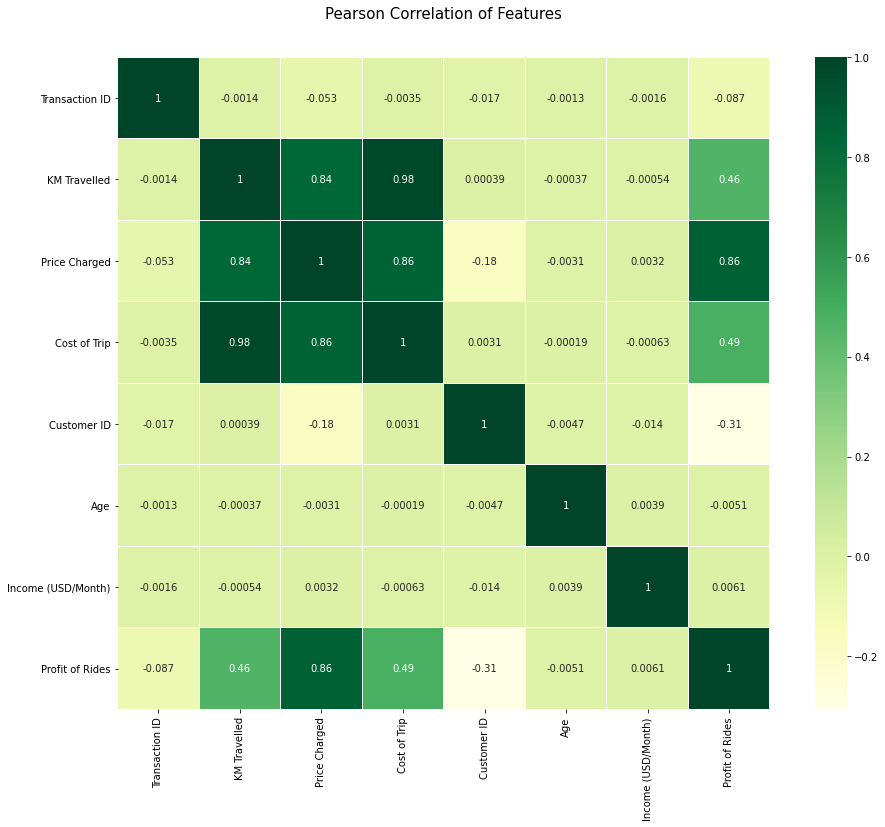

In [28]:
# Compute the correlation matrix
corr = final_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

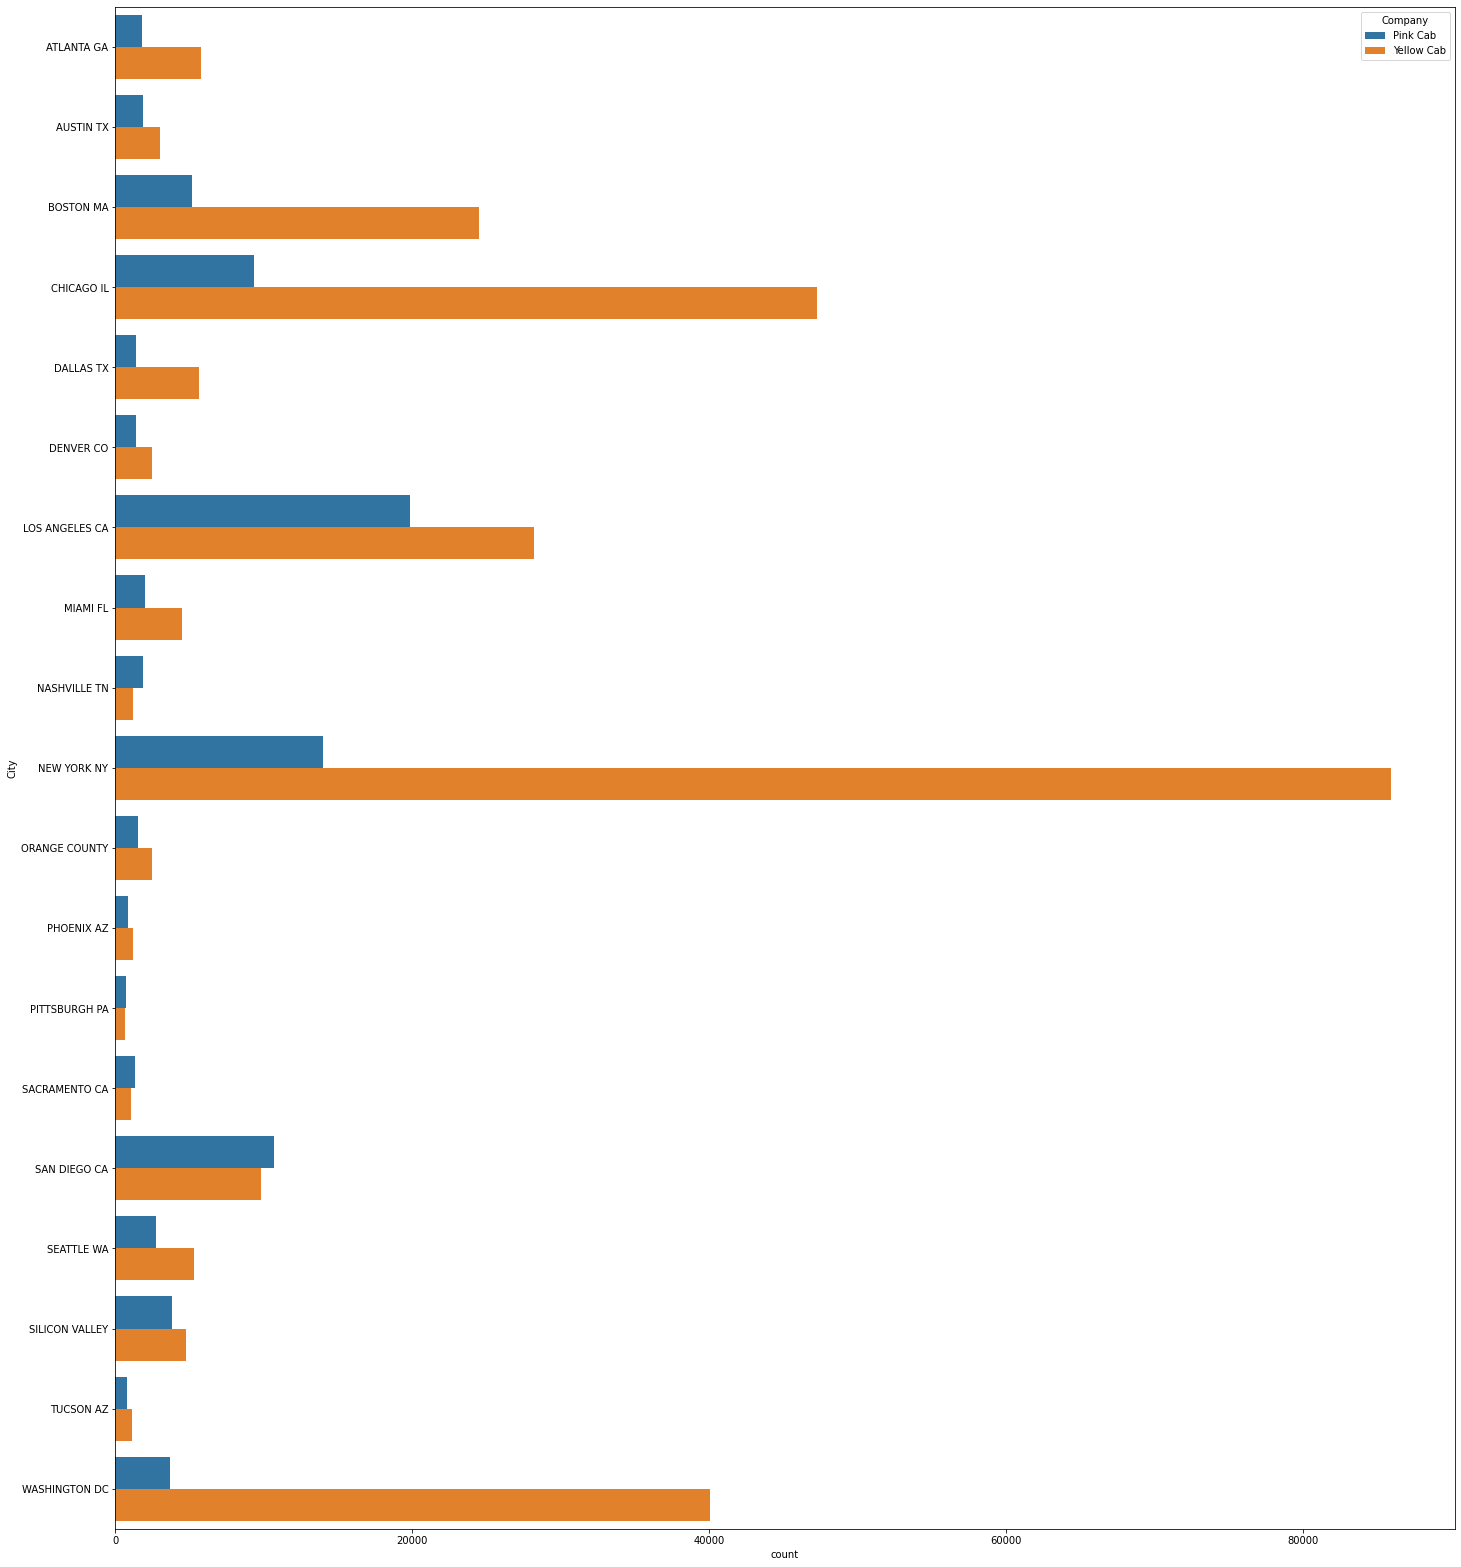

In [29]:
# City and Company distribution
plt.figure(figsize=(24,28))
ax = sns.countplot(y="City", hue="Company", data=final_data)

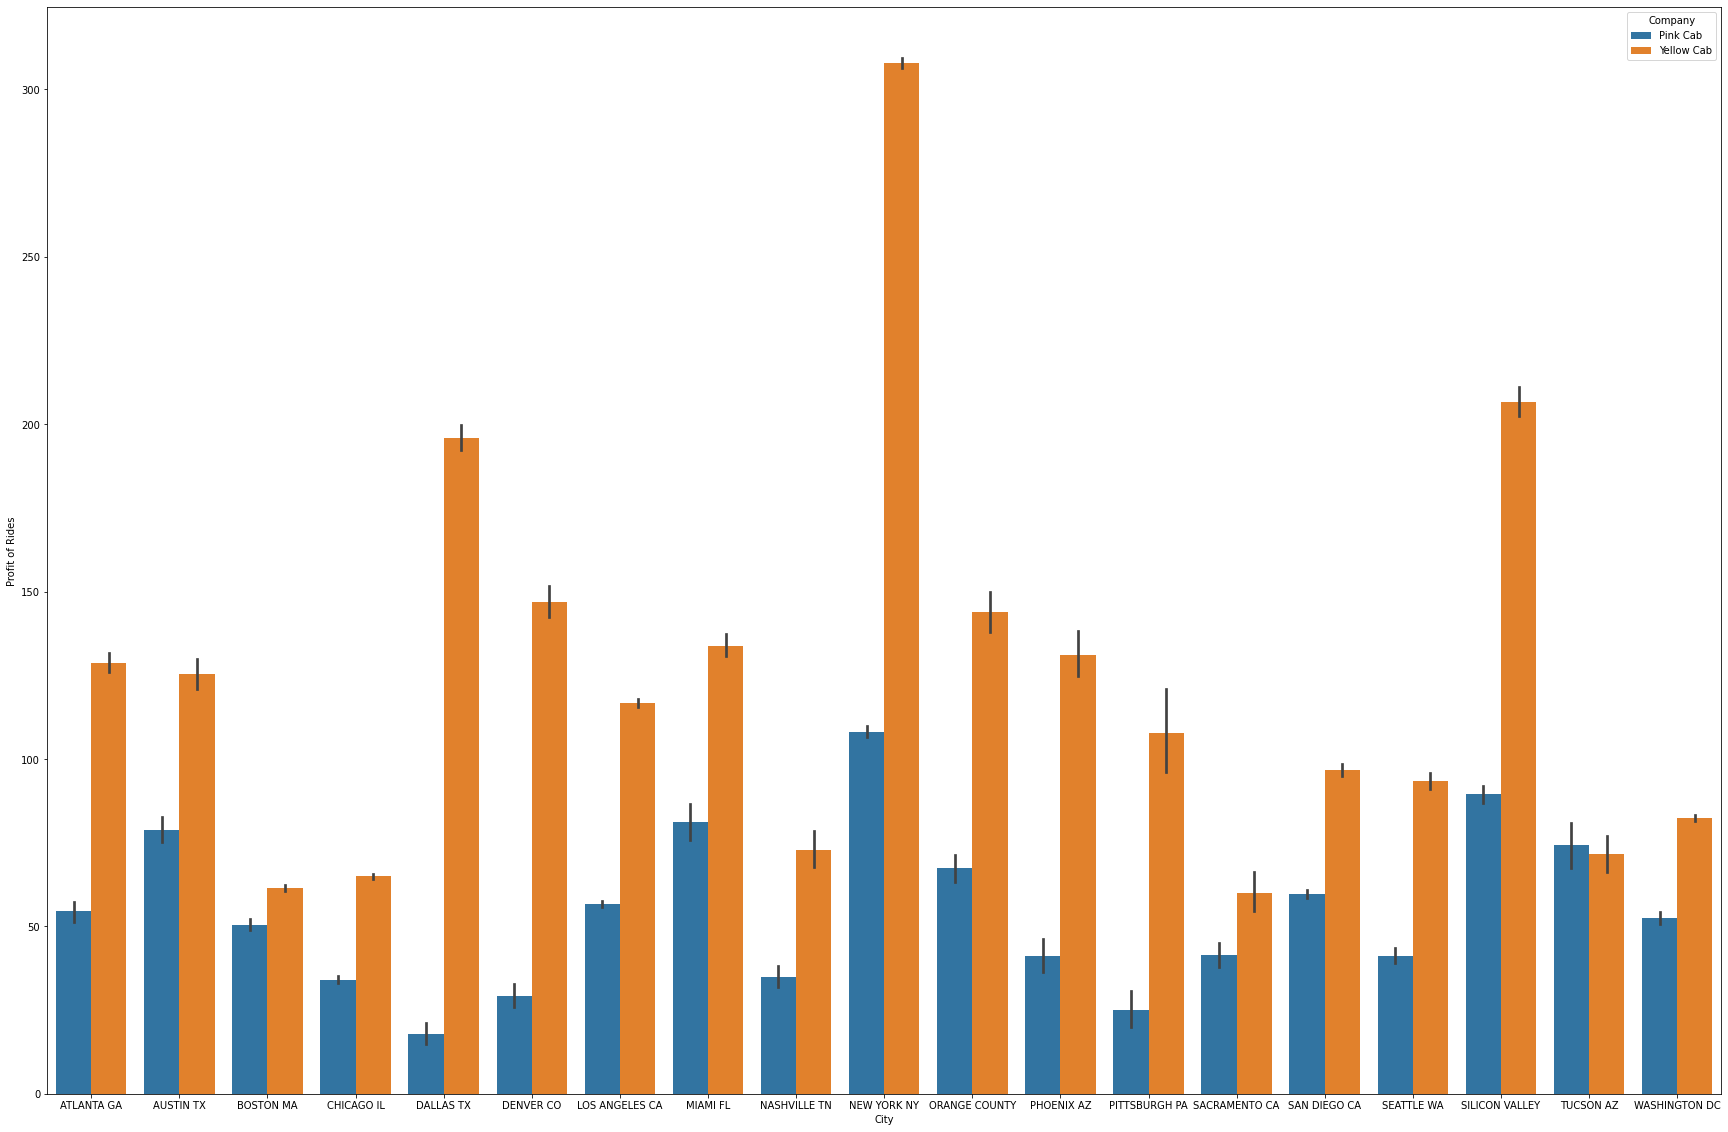

In [30]:
# Profit distribution by city and company
plt.figure(figsize=(30,20))
ax = sns.barplot(x="City", y="Profit of Rides", hue="Company", data=final_data)

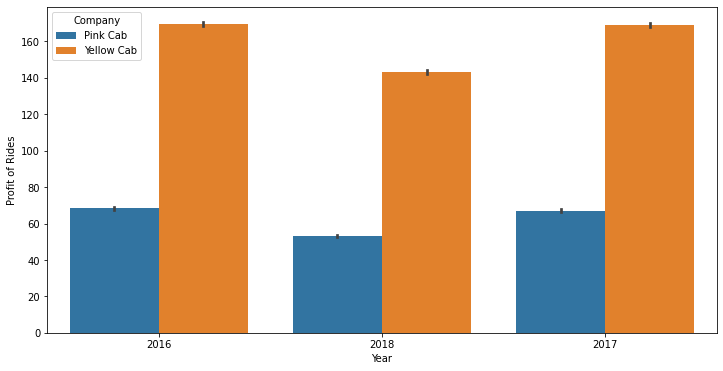

In [31]:
# Profit distribution by year and company
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Year", y="Profit of Rides", hue="Company", data=final_data)

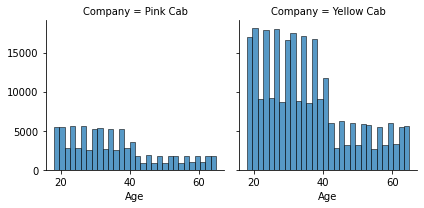

In [32]:
# Age range for Company
g = sns.FacetGrid(final_data, col = "Company")
g.map(sns.histplot, "Age", bins = 30)
plt.show()

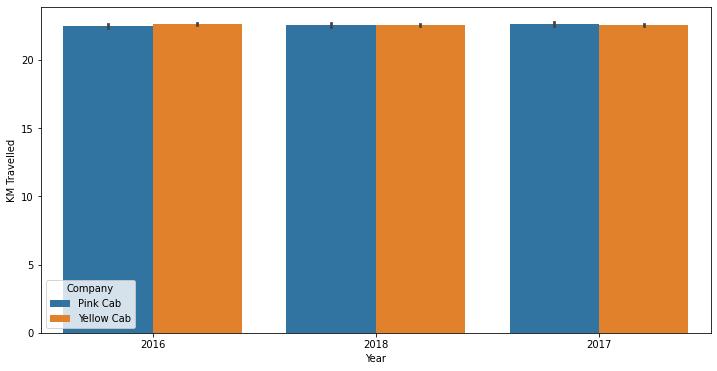

In [33]:
# KM Travelled ratio for Year and Company
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Year", y="KM Travelled", hue="Company", data=final_data)

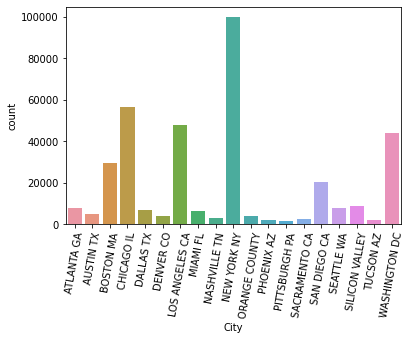

In [34]:
# City Distribution
sns.countplot(x="City", data=final_data)
plt.xticks(rotation = 80)
plt.show()

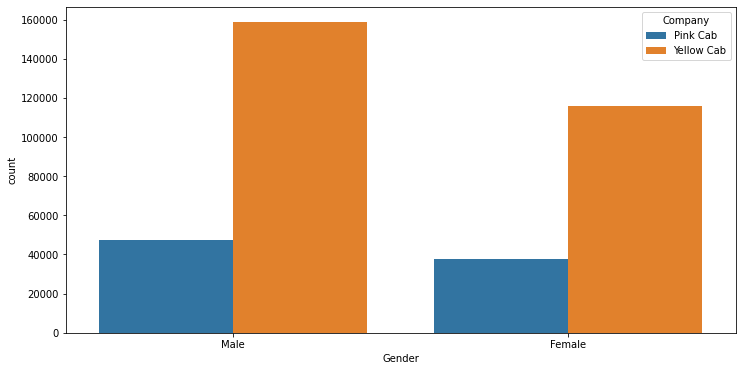

In [35]:
# Gender Distribution for Company
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Gender", hue="Company", data=final_data)

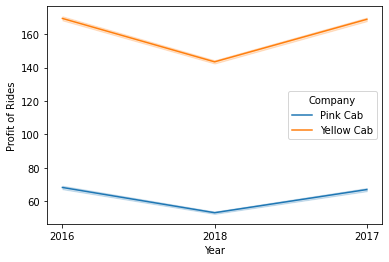

In [36]:
# Year and Profit for Company distribution
sns.lineplot(x='Year' , y='Profit of Rides' ,hue='Company',data=final_data)
plt.show()